## About the data
This is a campaign data of Food Mart (chain of convenience stores in US) where each record is a transaction of a customer in response to a campaign and their corresponding cost incurred to acquire the customer for that campaign.

## Columns
1. food_category- food type
2. food_department- department the food belongs to
3. food_family- family the food belongs to
4. store_sales- sales in million dollars 
5. store_cost- expenses in million dollars
6. unit_sales - quantity of sales in millions 
7. promotion_name- name used for promotion
8. sales_country- country where sale happen
9. marital_status- marital status of customer
10. gender- gender of customer
11. total_children- total children in home
12. education- education level of customer
13. member_card- member card of customer
14. occupation- occupation of customer
15. houseowner- if customer is a house owner or not 
16. avg_cars_at_home- average number of cars at customer's house
17. avg.yearly_income- yearly income range of customer
18. num_children_at_home- number of children for customer
19. brand_name- brand name of product purchase
20. SRD- Max retail price of item
21. gross_weight- gross weight of item 
22. net_weight- net weight of item
23. recyclable_package- whether the food item is in a recyclable packaging or not
24. low_fat - whether the food item is low on fat or not 
25. units_per_case- number of units per case available on store shelves
26. store_type - type of store
27. store_city - city where store belongs
28. store_state- state where store belongs 
29. store_sqft- store area in sqft
30. grocery_sqft- grocery area available in sqft
31. frozen_sqft- frozen food area available in sqft
32. meat_sqft- meat area available in sqft
33. cofee_bar- coffee bar available in store or not
34. video_store- video store available in store or not 
35. salad_bar- salad bar counter available in store or not 
36. prepared_food- prepared food available in store or not
37. florist- flower shelves available in store or not
38. media_type- media source for campaign
39. cost- cost on acquiring the customer in dollars



## Hypothesis to be tested via EDA
1. Do we have a better response rate based on the cost of the campaign? <br>
2. How is the spread of per transaction cost for a campaign and store and how does the response rate in accordance to the per transaction cost? <br>
3. How does each media type, store and product mix influence demand? <br>
    a. Is there a media type which garners more demand and which media has a beter cost per transaction? <br>
    b. Is there a store which gets better demand for its cost? <br>
    c. Which product is fast moving across countries? <br>
4. How does the product features influence demand? <br>
    a. Does price and brand influence demand? <br>
    b. Do we have health conscious customers? <br>
5. How does the store specific features influence demand? <br>
    a. Does demand increase with size of store? <br>
    b. What are the top sales making department in the store? <br>
    c. Which country has higher number of stores and sales? <br>
6. What is the customer demographics to target? <br>
    a. What is the percentage of demand from members? <br>
    b. Does this mart cater to high income customers? <br>

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import squarify
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
cac_data=pd.read_csv('cac_data.csv')
cac_data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
def flat_split(iterable, separator=None, limit=-1):
    for element in iterable:
        yield from element.split(separator, limit)

In [4]:
store_features = [
    "store_type",
    "store_city",
    "store_state",
    "store_sqft",
    "grocery_sqft",
    "frozen_sqft",
    "meat_sqft",
    "coffee_bar",
    "video_store",
    "salad_bar",
    "prepared_food",
    "florist",
]

product_features = [
    "food_category",
    "food_department",
    "food_family",
    "brand_name",
    "SRP",
    "gross_weight",
    "net_weight",
    "recyclable_package",
    "low_fat",
    "units_per_case",
]

customer_features = [
    "marital_status",
    "gender",
    "total_children",
    "education",
    "member_card",
    "occupation",
    "houseowner",
    "avg_cars_at home(approx)",
    "avg. yearly_income",
    "num_children_at_home"
]

promotion_features = ["promotion_name", "media_type"]

store_and_product_features = [
    "store_sales(in millions)",
    "store_cost(in millions)",
    "unit_sales(in millions)",
]

In [5]:
store_data=cac_data.loc[:,store_features].drop_duplicates().reset_index(drop=True)
promotion_data=cac_data.loc[:,promotion_features].drop_duplicates().reset_index(drop=True)
product_data=cac_data.loc[:,product_features].drop_duplicates().reset_index(drop=True)
customer_data=cac_data.loc[:,customer_features].drop_duplicates().reset_index(drop=True)

In [6]:
intermediate_data=(cac_data.drop(columns='avg_cars_at home(approx).1'))
intermediate_data=intermediate_data.merge((store_data.assign(store_id=lambda df: np.arange(len(df))).set_index(store_features)
                                           ),on=store_features,).drop(columns=store_features)
intermediate_data=intermediate_data.merge((customer_data.assign(customer_id=lambda df: np.arange(len(df))).set_index(customer_features)
                                           ),on=customer_features,).drop(columns=customer_features)
intermediate_data=intermediate_data.merge((product_data.assign(product_id=lambda df: np.arange(len(df))).set_index(product_features)
                                           ),on=product_features,).drop(columns=product_features)
intermediate_data=intermediate_data.merge((promotion_data.assign(promotion_id=lambda df: np.arange(len(df))).set_index(promotion_features)
                                           ),on=promotion_features,).drop(columns=promotion_features)

sales_data=intermediate_data.drop(columns=['cost','customer_id']).drop_duplicates()

cost_data=intermediate_data.drop(columns=[        "store_sales(in millions)",
        "store_cost(in millions)",
        "unit_sales(in millions)"])

channel_data=(
    pd.DataFrame({
        'media_type': promotion_data.media_type, 
        **{
            channel: promotion_data.media_type.str.contains(channel) for channel in flat_split(promotion_data.media_type.unique(),", ")

        },
    }
).set_index('media_type').drop_duplicates().astype(int)
)

In [7]:
intermediate_data.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),sales_country,cost,store_id,customer_id,product_id,promotion_id
0,7.36,2.7232,4.0,USA,126.62,0,0,0,0
1,5.52,2.5944,3.0,USA,59.86,0,1,0,1
2,3.68,1.3616,2.0,USA,84.16,0,2,0,2
3,3.68,1.1776,2.0,USA,95.78,0,3,0,3
4,4.08,1.4280,3.0,USA,50.79,0,4,1,4


In [8]:
cost_data.head()

,sales_country,cost,store_id,customer_id,product_id,promotion_id
0,USA,126.62,0,0,0,0
1,USA,59.86,0,1,0,1
2,USA,84.16,0,2,0,2
3,USA,95.78,0,3,0,3
4,USA,50.79,0,4,1,4


In [9]:
sales_data.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),sales_country,store_id,product_id,promotion_id
0,7.36,2.7232,4.0,USA,0,0,0
1,5.52,2.5944,3.0,USA,0,0,1
2,3.68,1.3616,2.0,USA,0,0,2
3,3.68,1.1776,2.0,USA,0,0,3
4,4.08,1.4280,3.0,USA,0,1,4


In [10]:
promotion_data.head()

,promotion_name,media_type
0,Bag Stuffers,"Daily Paper, Radio"
1,Cash Register Lottery,"Daily Paper, Radio"
2,High Roller Savings,"Daily Paper, Radio"
3,Cash Register Lottery,In-Store Coupon
4,Double Down Sale,Radio


In [11]:
channel_data.head()

,Daily Paper,Radio,In-Store Coupon,Product Attachment,Sunday Paper,TV,Street Handout,Bulk Mail,Cash Register Handout
media_type,,,,,,,,,
"Daily Paper, Radio",1,1,0,0,0,0,0,0,0
In-Store Coupon,0,0,1,0,0,0,0,0,0
Radio,0,1,0,0,0,0,0,0,0
Daily Paper,1,0,0,0,0,0,0,0,0
Product Attachment,0,0,0,1,0,0,0,0,0


In [12]:
def drop_col_level(df, level=0):
    df.columns = df.columns.droplevel(level=level)

    return df

modelling_data = (
    cost_data.groupby(["promotion_id", "cost","sales_country"]).agg({
        "store_id": [("store_id", lambda x: ",".join(map(str, x.unique()))), ("store_count", "nunique")],
        "product_id": [("n_products", "nunique")],
        "customer_id": [("target", "count")]
    }).transform(drop_col_level).sort_index().reset_index().drop(columns="cost").query("store_count == 1").drop(columns="store_count").astype({"store_id": int})
    .pipe(lambda x: pd.get_dummies(x, columns=["store_id"]))
    .merge(promotion_data, left_on="promotion_id", right_index=True)
    .merge(channel_data, left_on="media_type", right_index=True)
    .drop(columns=["media_type", "promotion_id"])
)

modelling_data.head()

,sales_country,n_products,target,store_id_0,store_id_1,store_id_2,store_id_3,store_id_4,store_id_5,store_id_6,store_id_7,store_id_8,store_id_9,store_id_10,store_id_11,store_id_12,store_id_13,store_id_14,store_id_15,store_id_16,store_id_17,store_id_18,store_id_19,promotion_name,Daily Paper,Radio,In-Store Coupon,Product Attachment,Sunday Paper,TV,Street Handout,Bulk Mail,Cash Register Handout
0,USA,22,22,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,Bag Stuffers,1,1,0,0,0,0,0,0,0
1,USA,514,593,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Bag Stuffers,1,1,0,0,0,0,0,0,0
2,USA,583,726,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Cash Register Lottery,1,1,0,0,0,0,0,0,0
3,USA,213,228,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,High Roller Savings,1,1,0,0,0,0,0,0,0
4,USA,238,254,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Cash Register Lottery,0,0,1,0,0,0,0,0,0


## 1. Do we have a better response rate based on the cost of campaign?

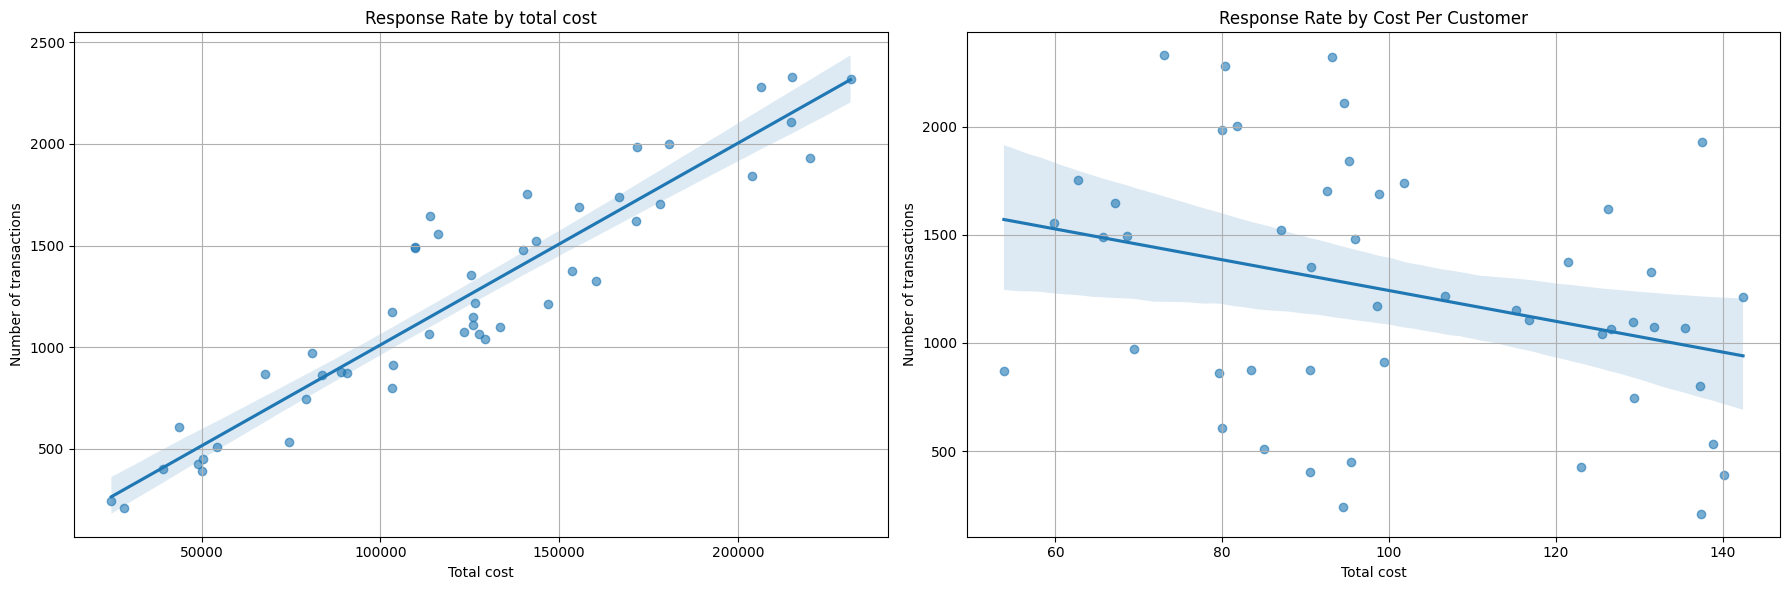

In [43]:
viz_1=cost_data.merge(promotion_data,left_on='promotion_id',right_index=True)
result_viz_1=viz_1.groupby('promotion_name').agg(
    total_costs=('cost','sum'),
    cost_per_customer=('cost','median'),
    n_transactions=('promotion_name','size'),
    n_stores=('store_id','nunique'),
    cost_spread=('cost',lambda x:x.max()-x.min())
).sort_index().reset_index()

fig,axs=plt.subplots(1,2,figsize=(18,6))

sns.regplot(x='total_costs',y='n_transactions',data=result_viz_1,scatter_kws={'alpha':0.6},ax=axs[0])
axs[0].set_title('Response Rate by total cost')
axs[0].set_xlabel('Total cost')
axs[0].set_ylabel('Number of transactions')
axs[0].grid(True)

sns.regplot(x='cost_per_customer',y='n_transactions',data=result_viz_1,scatter_kws={'alpha':0.6},ax=axs[1])
axs[1].set_title('Response Rate by Cost Per Customer')
axs[1].set_xlabel('Total cost')
axs[1].set_ylabel('Number of transactions')
axs[1].grid(True)

plt.tight_layout()
plt.show()

##### Insights:
- There is a direct linear relationship between the total cost and the response rate from the customer, however the cost per transaction doesn't have  positive relationship, we presume that customers are likely to purchase products that have deep discounts however thats not the case from this dataset.

## 2. How is the spread of per transaction cost for a campaign and store and how does the response rate in accordance to the per transaction cost?

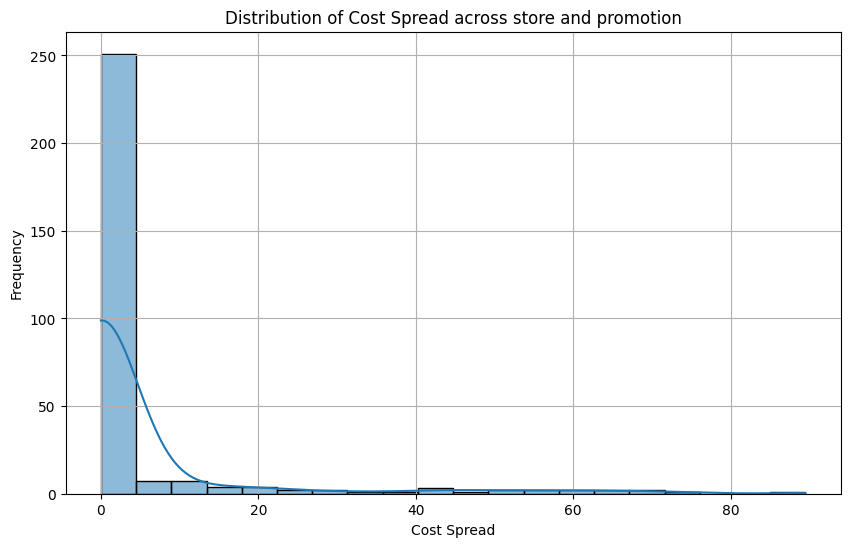

In [44]:
cost_spread=viz_1.groupby(['store_id','promotion_name']).agg(
    cost_spread=('cost',lambda x:x.max()-x.min())
).sort_index().reset_index()

plt.figure(figsize=(10,6))
sns.histplot(cost_spread['cost_spread'],bins=20,kde=True)
plt.title('Distribution of Cost Spread across store and promotion')
plt.xlabel('Cost Spread')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Insights:
- In majority of the cases, the cost remains unchanged across store and promotion 
- In such cases, modelling for demand would suffice cost can be extrapolated from the demand.

## 3. How does each media type, store and product mix influence demand?
#### 3 a. Is there a media type which garners more demand and which media has a beter cost per transaction?

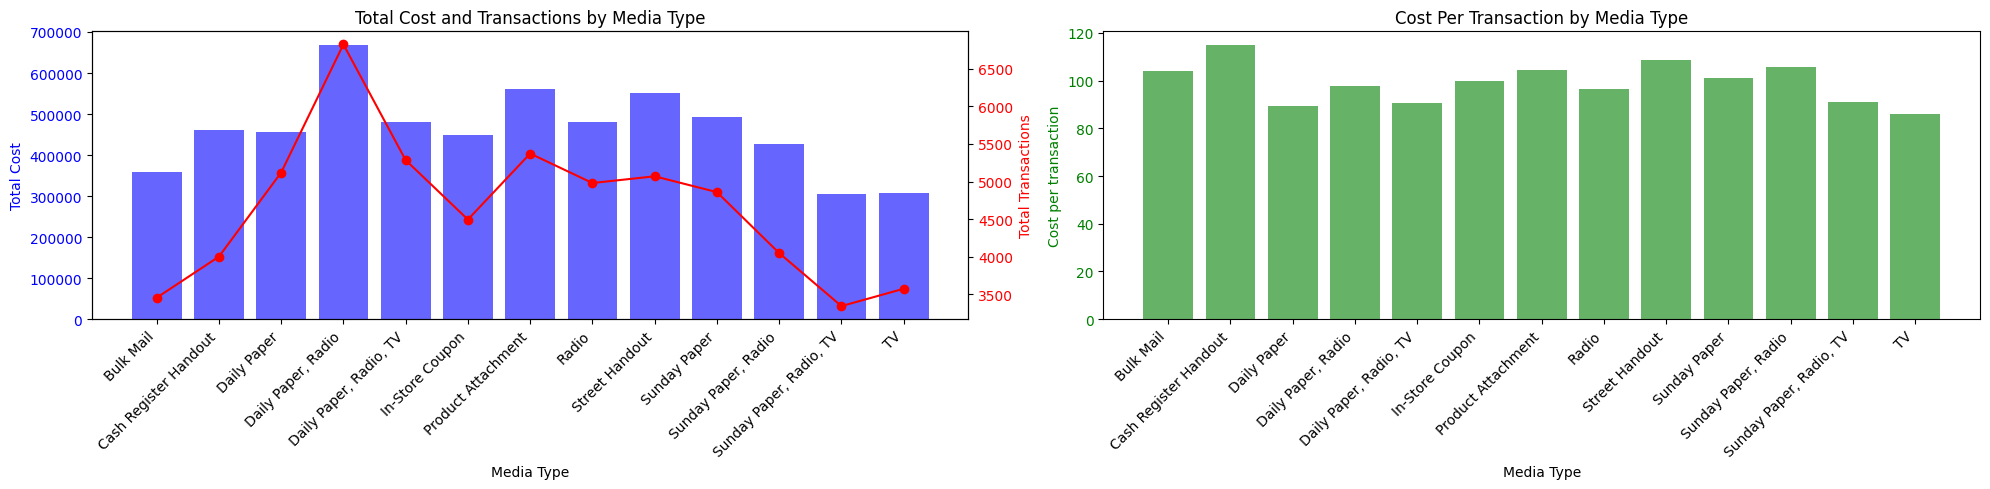

In [45]:
target_data=cost_data.merge(product_data,left_on='product_id',right_index=True)
result_viz_2=viz_1.groupby('media_type').agg(
    total_transactions=('media_type','size'),
    total_cost=('cost','sum')
)
result_viz_2['cost_per_transaction'] = result_viz_2['total_cost']/result_viz_2['total_transactions']

fig,(ax1,ax3)=plt.subplots(1,2,figsize=(20,5))

ax1.bar(result_viz_2.index,result_viz_2['total_cost'],color='b',alpha=0.6)
ax1.set_xlabel('Media Type')
ax1.set_ylabel('Total Cost',color='b')
ax1.tick_params(axis='y',labelcolor='b')

ax2=ax1.twinx()
ax2.plot(result_viz_2.index,result_viz_2['total_transactions'],color='r',marker='o')
ax2.set_ylabel('Total Transactions',color='r')
ax2.tick_params(axis='y',labelcolor='r')

ax1.set_xticks(range(len(result_viz_2.index)))
ax1.set_xticklabels(result_viz_2.index,rotation=45,ha='right')
ax1.set_title('Total Cost and Transactions by Media Type')


ax3.bar(result_viz_2.index,result_viz_2['cost_per_transaction'],color='g',alpha=0.6)
ax3.set_xlabel('Media Type')
ax3.set_ylabel('Cost per transaction',color='g')
ax3.tick_params(axis='y',labelcolor='g')

ax3.set_xticks(range(len(result_viz_2.index)))
ax3.set_xticklabels(result_viz_2.index,rotation=45,ha='right')
ax3.set_title('Cost Per Transaction by Media Type')

plt.tight_layout()
plt.show()

#### 3 b. Is there a store which gets better demand for its cost? 

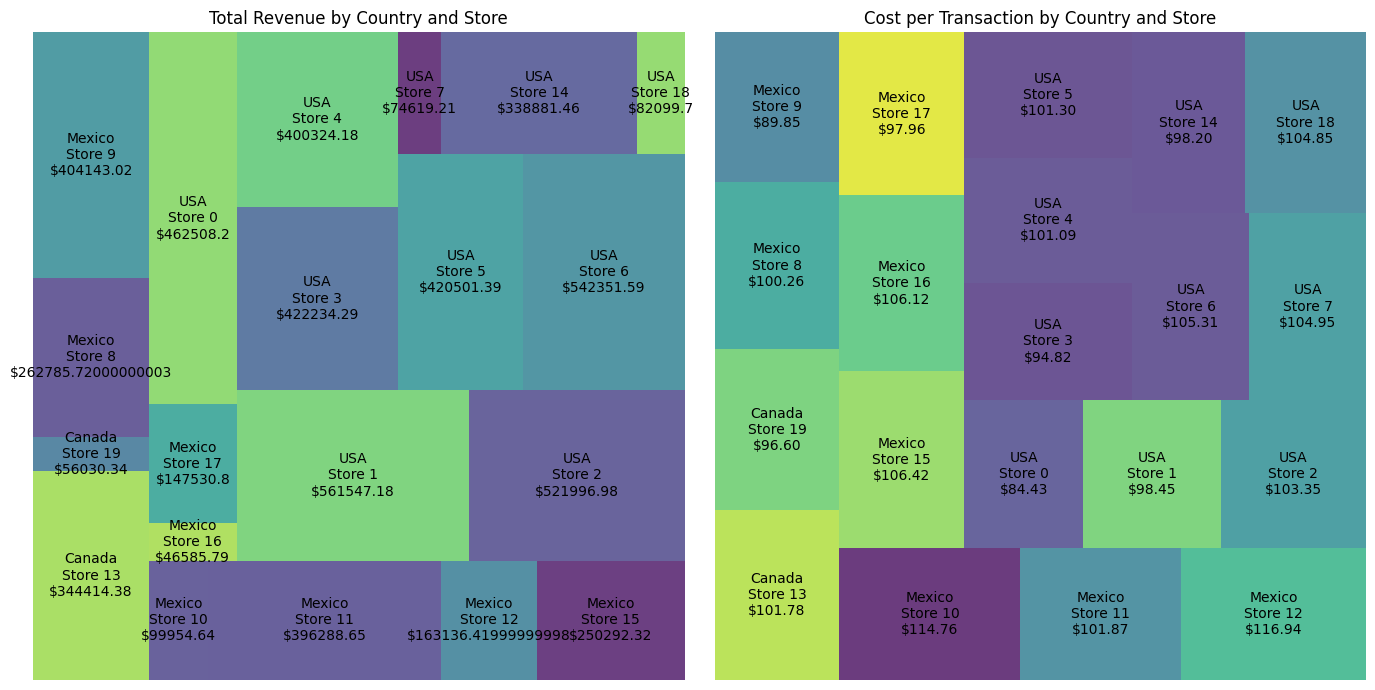

In [46]:
store_summary=target_data.groupby(['sales_country','store_id']).agg(
    total_revenue=('cost','sum'),
    num_transactions=('cost','count')
).reset_index()

store_summary['cost_per_transaction']=store_summary['total_revenue']/store_summary['num_transactions']


# Create treemaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Treemap for Total Revenue
sizes = store_summary['total_revenue']
labels = store_summary.apply(lambda x: f"{x['sales_country']}\nStore {x['store_id']}\n${x['total_revenue']}", axis=1)
squarify.plot(sizes=sizes, label=labels, ax=ax1, alpha=.8)
ax1.set_title('Total Revenue by Country and Store')
ax1.axis('off')

# Treemap for Cost per Transaction
sizes = store_summary['cost_per_transaction']
labels = store_summary.apply(lambda x: f"{x['sales_country']}\nStore {x['store_id']}\n${x['cost_per_transaction']:.2f}", axis=1)
squarify.plot(sizes=sizes, label=labels, ax=ax2, alpha=.8)
ax2.set_title('Cost per Transaction by Country and Store')
ax2.axis('off')

plt.tight_layout()
plt.show()

#### 3 c. Which product is fast moving across countries? <br>

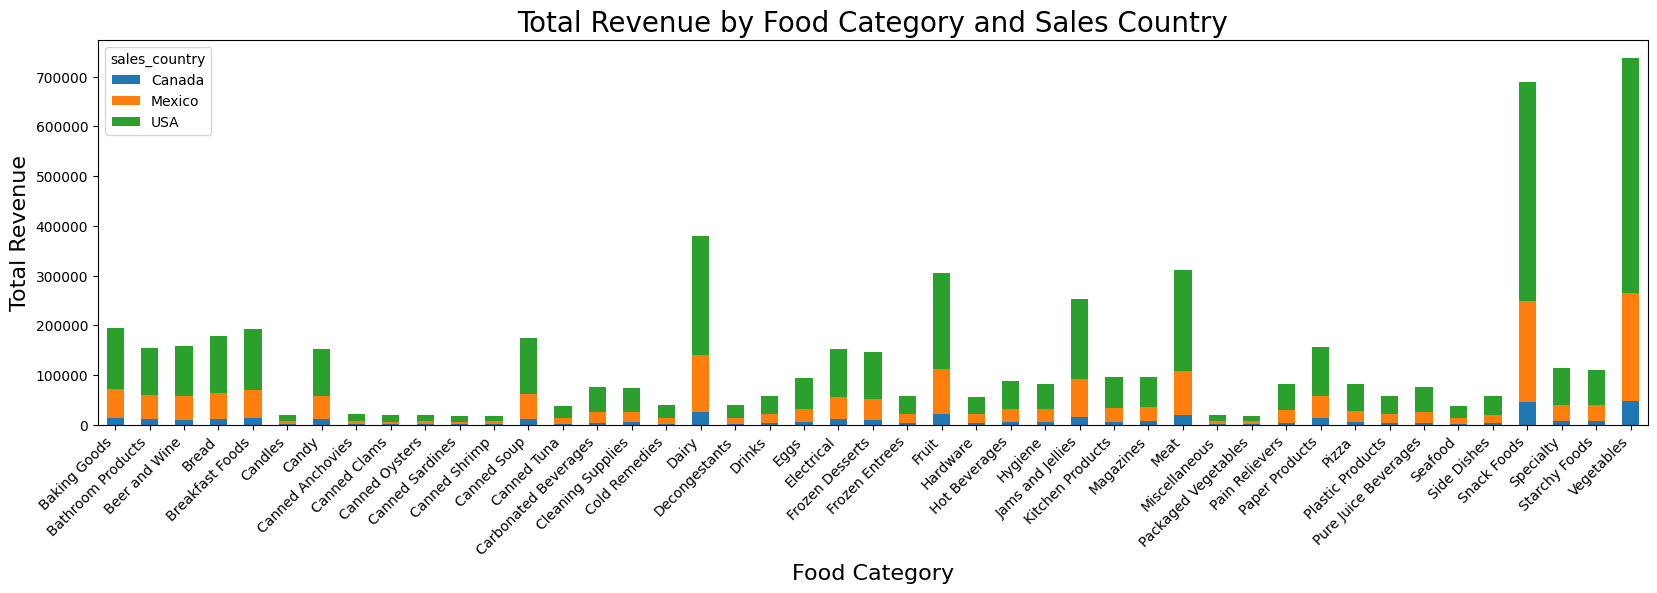

In [47]:
country_food_summary=target_data.groupby(['sales_country','food_category']).agg(
    total_revenue=('cost','sum'),
    num_transactions=('cost','count')
).reset_index()


fig, ax = plt.subplots(figsize=(20, 5))
pivot_data = country_food_summary.pivot(index='food_category', columns='sales_country', values='total_revenue')
pivot_data.plot(kind='bar', stacked=True, ax=ax)


ax.set_title('Total Revenue by Food Category and Sales Country', fontsize=20)
ax.set_xlabel('Food Category', fontsize=16)
ax.set_ylabel('Total Revenue', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

##### Insights:
- Bulk Mail and Cash register handout seems to be a poor choice for campaign as their cost per transaction is way too high comparitively
- Daily Paper and Radio seems to be the ideal and popular choice for promotion in this dataset
- Majority of the transactions in this dataset is from USA, and cost of campaign is relatively lower
- Snackfood and Vegetables are the popular choices in the demand. Followed by fruit and dairy

## 4. How does the product features influence demand? <br>

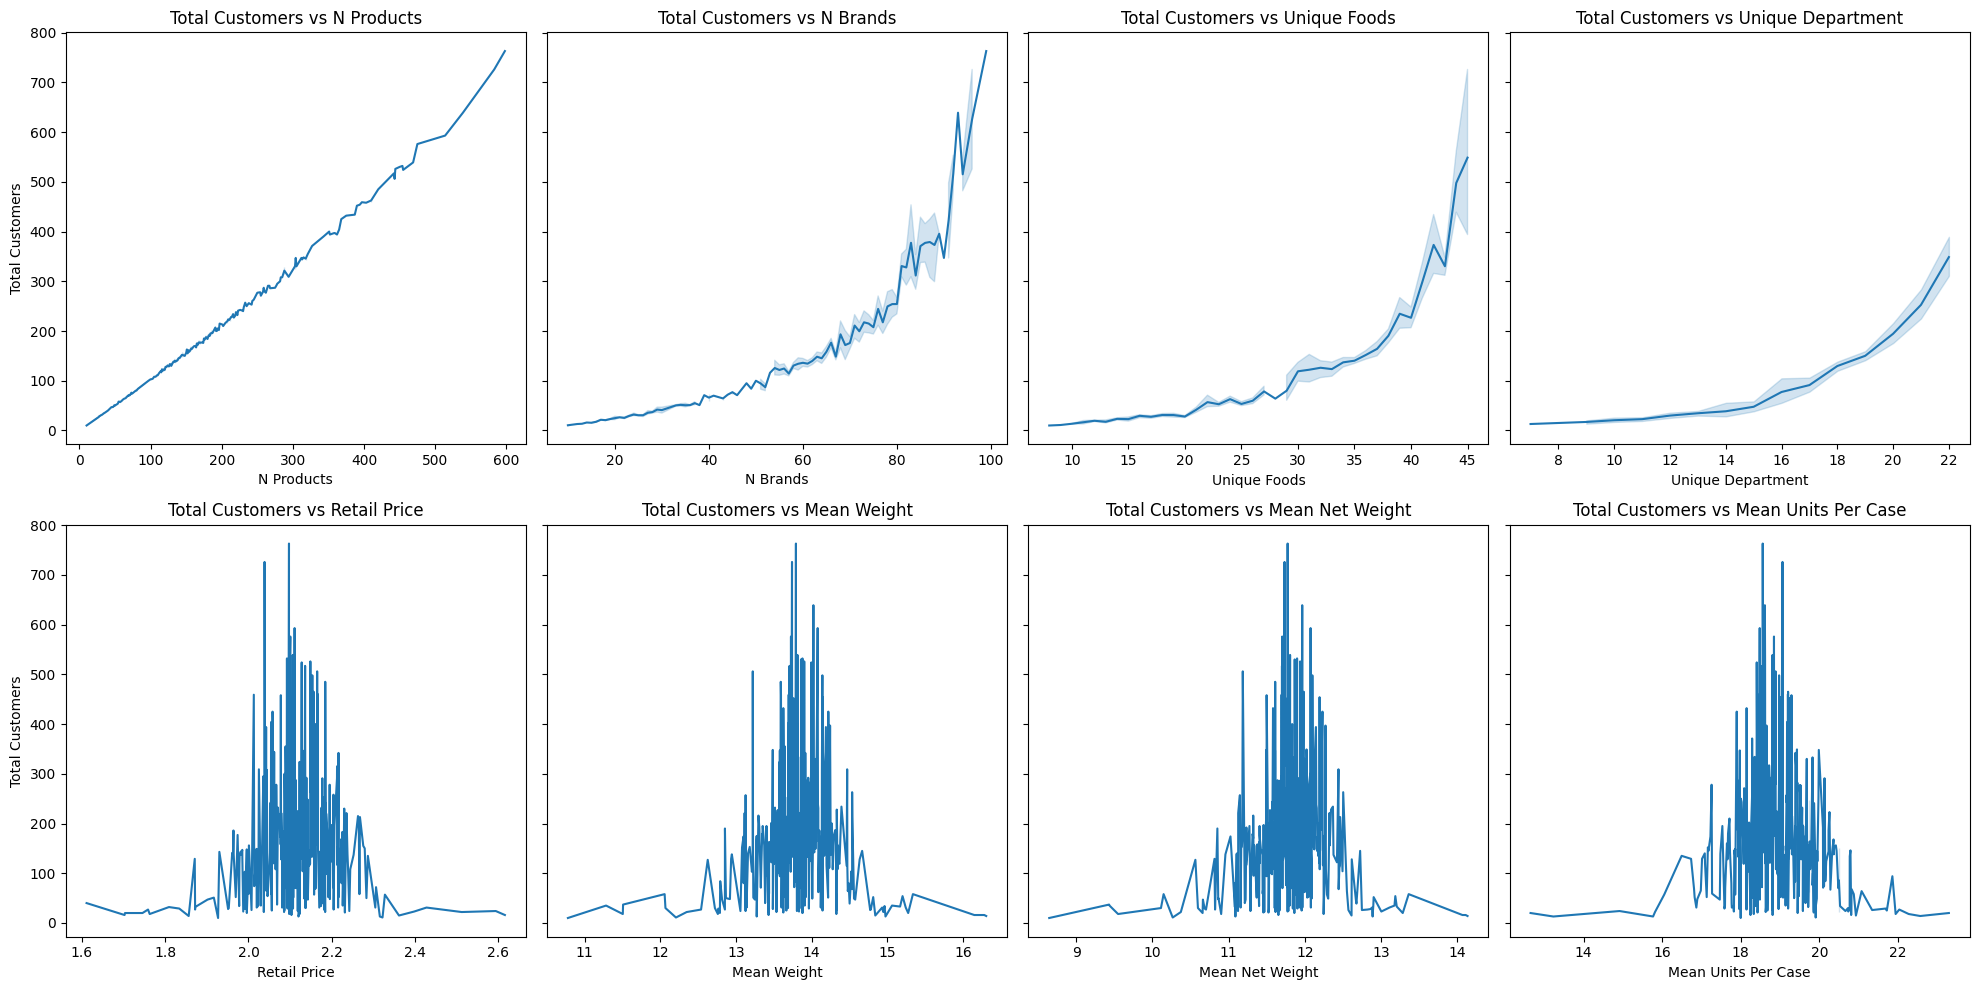

In [48]:
product_data = target_data.groupby(['promotion_id', 'store_id', 'cost']).agg(
    total_customers=('customer_id', 'count'),
    n_products=('product_id', 'nunique'),
    n_brands=('brand_name', 'nunique'),
    unique_foods=('food_category', 'nunique'),
    unique_department=('food_department', 'nunique'),
    retail_price=('SRP', 'mean'),
    mean_weight=('gross_weight', 'mean'),
    mean_net_weight=('net_weight', 'mean'),
    mean_units_per_case=('units_per_case', 'mean')
).reset_index()

product_metrics=[
    'n_products', 'n_brands', 'unique_foods', 
    'unique_department', 'retail_price', 'mean_weight', 
    'mean_net_weight', 'mean_units_per_case'
]

n_rows=2
n_cols=4

fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,10),sharey=True)
axes=axes.flatten()
for i, metric in enumerate(product_metrics):
    sns.lineplot(ax=axes[i],data=product_data,x=metric,y='total_customers')
    axes[i].set_title(f'Total Customers vs {metric.replace("_"," ").title()}')
    axes[i].set_xlabel(metric.replace("_"," ").title())
    axes[i].set_ylabel('Total Customers')

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 4 a. Does price and brand influence demand? 
#### 4 b. Do we have health conscious customers?

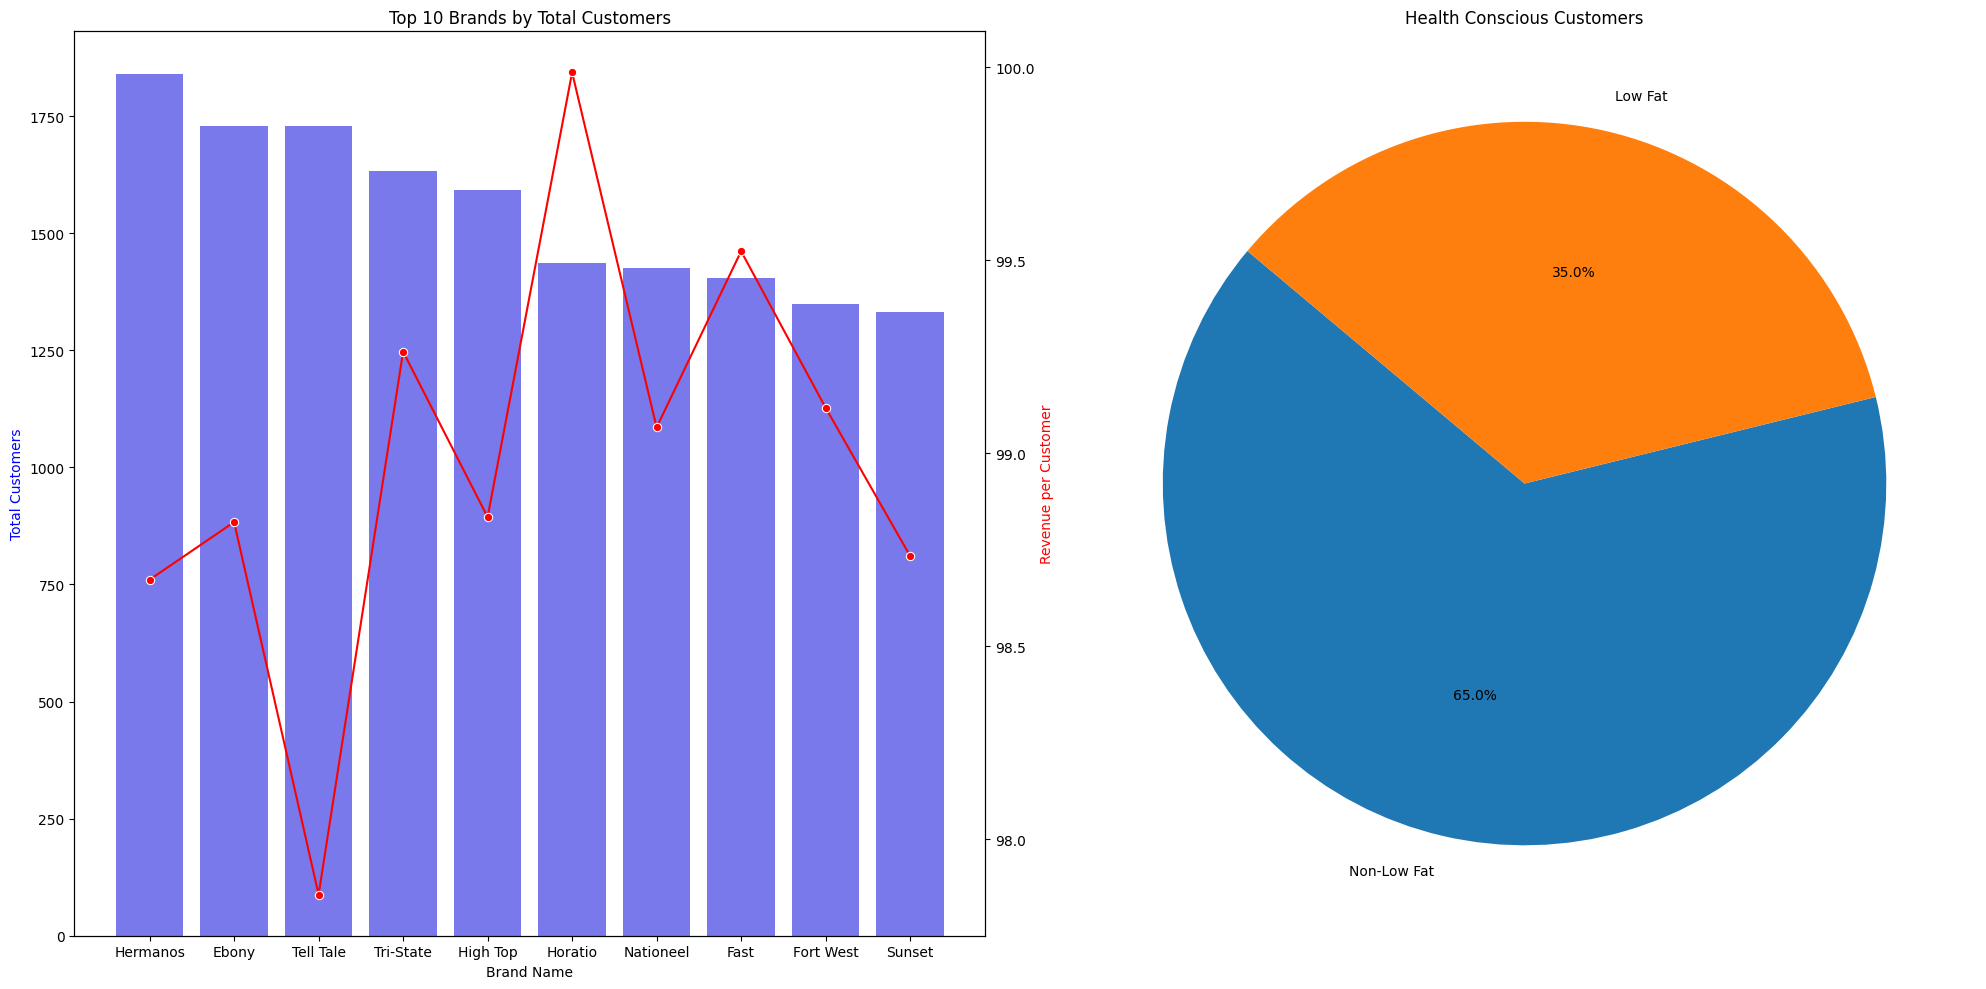

In [49]:
brand_influence = target_data.groupby('brand_name').agg(
    total_customers=('customer_id', 'count'),
    total_revenue=('cost', 'sum')
).reset_index()

brand_influence['revenue_per_customer'] =brand_influence['total_revenue']/brand_influence['total_customers']
top_brands=brand_influence.sort_values(by='total_customers',ascending=False).head(10)

health_conscious=target_data.groupby('low_fat').agg(
    total_customers=('customer_id', 'count')
).reset_index()

fig,axes=plt.subplots(1,2,figsize=(20,10))

ax1=axes[0]
sns.barplot(ax=ax1,data=top_brands,x='brand_name',y='total_customers',color='b',alpha=0.6)
ax2=ax1.twinx()
sns.lineplot(ax=ax2,data=top_brands,x='brand_name',y='revenue_per_customer',color='r',marker='o')
ax1.set_title('Top 10 Brands by Total Customers')
ax1.set_xlabel('Brand Name')
ax1.set_ylabel('Total Customers',color='b')
ax2.set_ylabel('Revenue per Customer',color='r')



ax3=axes[1]
health_labels=health_conscious['low_fat'].map({0:'Non-Low Fat',1:'Low Fat'})
ax3.pie(health_conscious['total_customers'],labels=health_labels,autopct='%1.1f%%',startangle=140)
ax3.set_title('Health Conscious Customers')

plt.tight_layout()
plt.show()

#### Insights:
- There is a strong positive linear relationship between the number of products and total customers. As the number of products increases, the total number of customers also increases. A larger variety of products attracts more customers.
- There is a positive relationship with some variability. As the number of unique foods increases, the total number of customers also increases, particularly after about 20 unique foods. Offering a wider variety of unique foods can attract more customers, especially beyond a certain threshold.
- Increasing the number of products, brands, unique foods, and unique departments can significantly attract more customers.
- Price, Weight and units per case are centered around the mean and doesnt have a positive relationship with demand.
- Maintaining a retail price around 2.0 and packaging products with a mean weight of 13-14 units, a mean net weight of 11-12 units, and around 18-19 units per case are effective strategies to attract and retain customers.
- For the top 10 brands with respect to demand, the top 3 has very low revenue per customer
- There are only 35% of the customers who has preferred low fat food product

## 5. How does the store specific features influence demand? <br>
#### 5 a. Does demand increase with size of store? 

In [50]:
store_lambda=(cac_data.drop(columns='avg_cars_at home(approx).1'))
store_lambda=store_lambda.merge((store_data.assign(store_id=lambda df: np.arange(len(df))).set_index(store_features)
                                           ),on=store_features,)
columns_to_drop=['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case','media_type']

store_lambda.drop(columns=columns_to_drop,inplace=True)

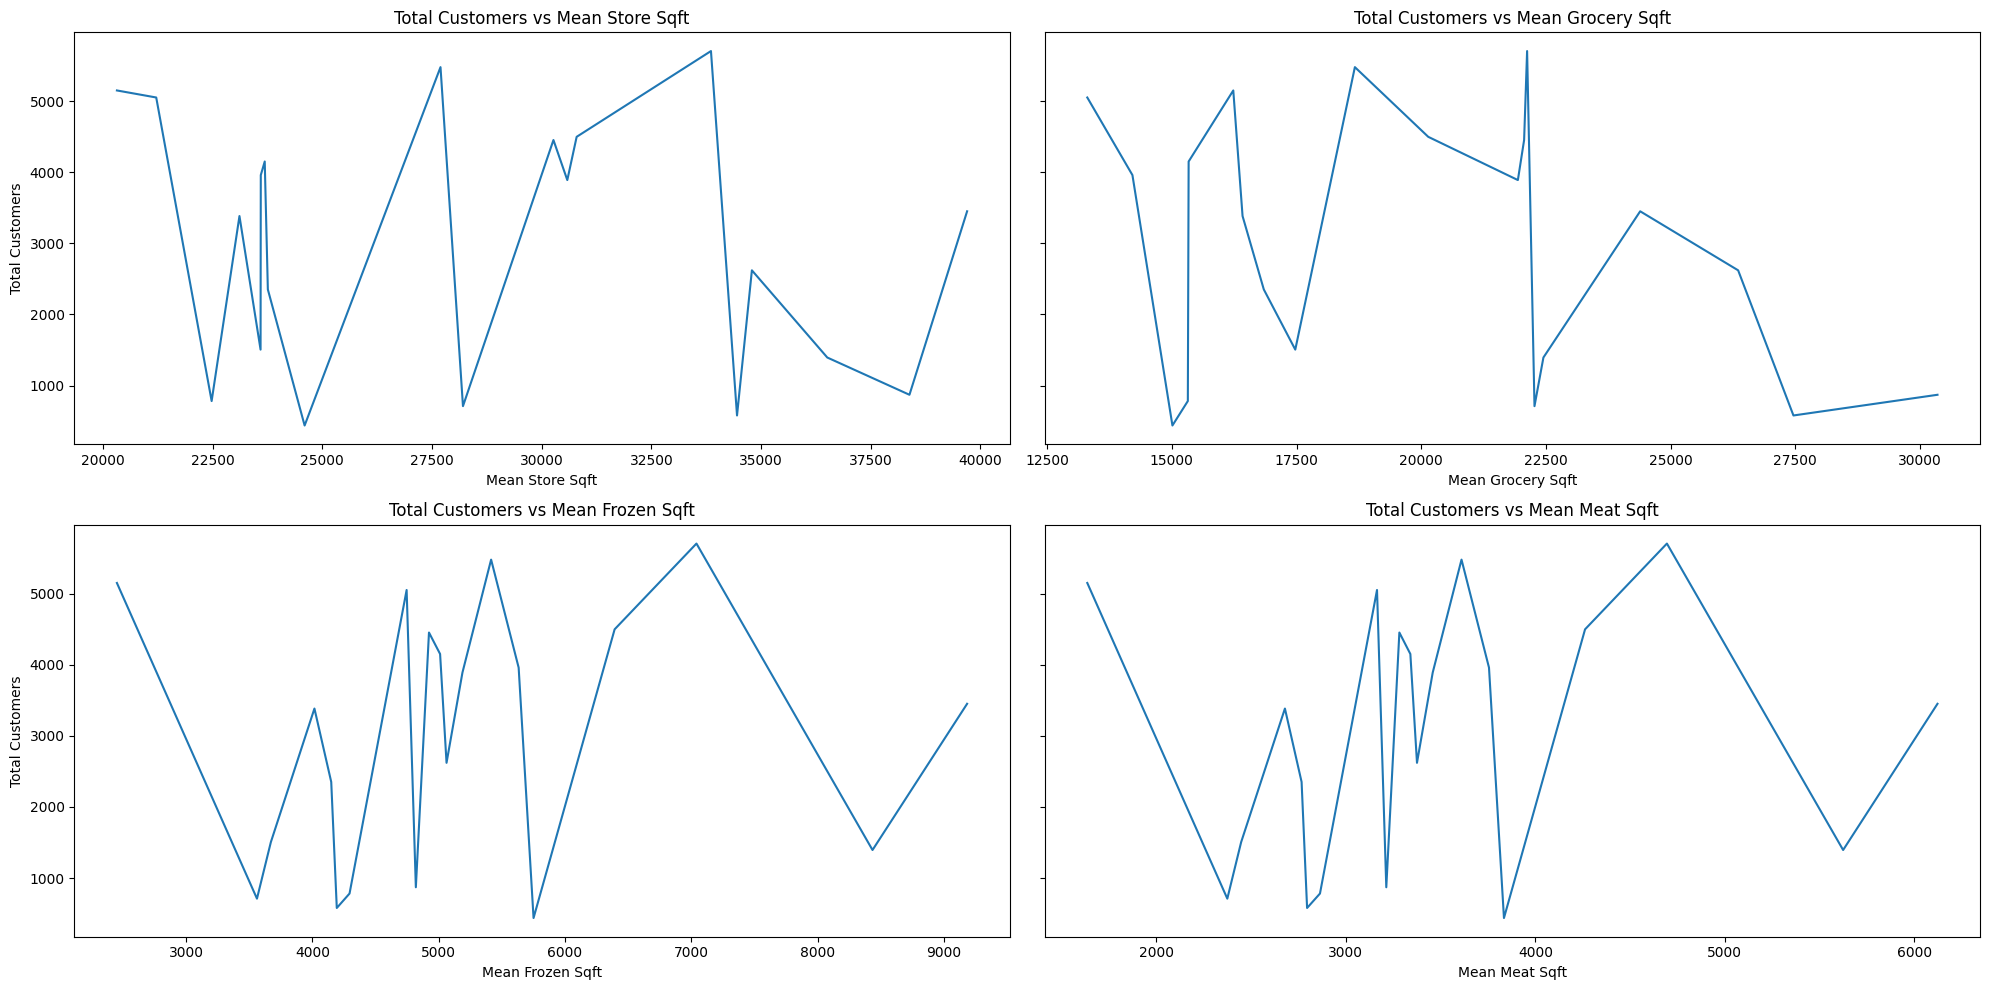

In [51]:
store_size_data = store_lambda.groupby(['store_id',]).agg(
    total_customers=('cost', 'count'),
    mean_store_sqft=('store_sqft','mean'),
    mean_grocery_sqft=('grocery_sqft','mean'),
    mean_frozen_sqft=('frozen_sqft','mean'),
    mean_meat_sqft=('meat_sqft','mean')
).reset_index()

store_size_metrics=[
    'mean_store_sqft','mean_grocery_sqft','mean_frozen_sqft','mean_meat_sqft'	
]

n_rows=2
n_cols=2

fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,10),sharey=True)
axes=axes.flatten()
for i, metric in enumerate(store_size_metrics):
    sns.lineplot(ax=axes[i],data=store_size_data,x=metric,y='total_customers')
    axes[i].set_title(f'Total Customers vs {metric.replace("_"," ").title()}')
    axes[i].set_xlabel(metric.replace("_"," ").title())
    axes[i].set_ylabel('Total Customers')

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 5 b. What are the top sales making department in the store?

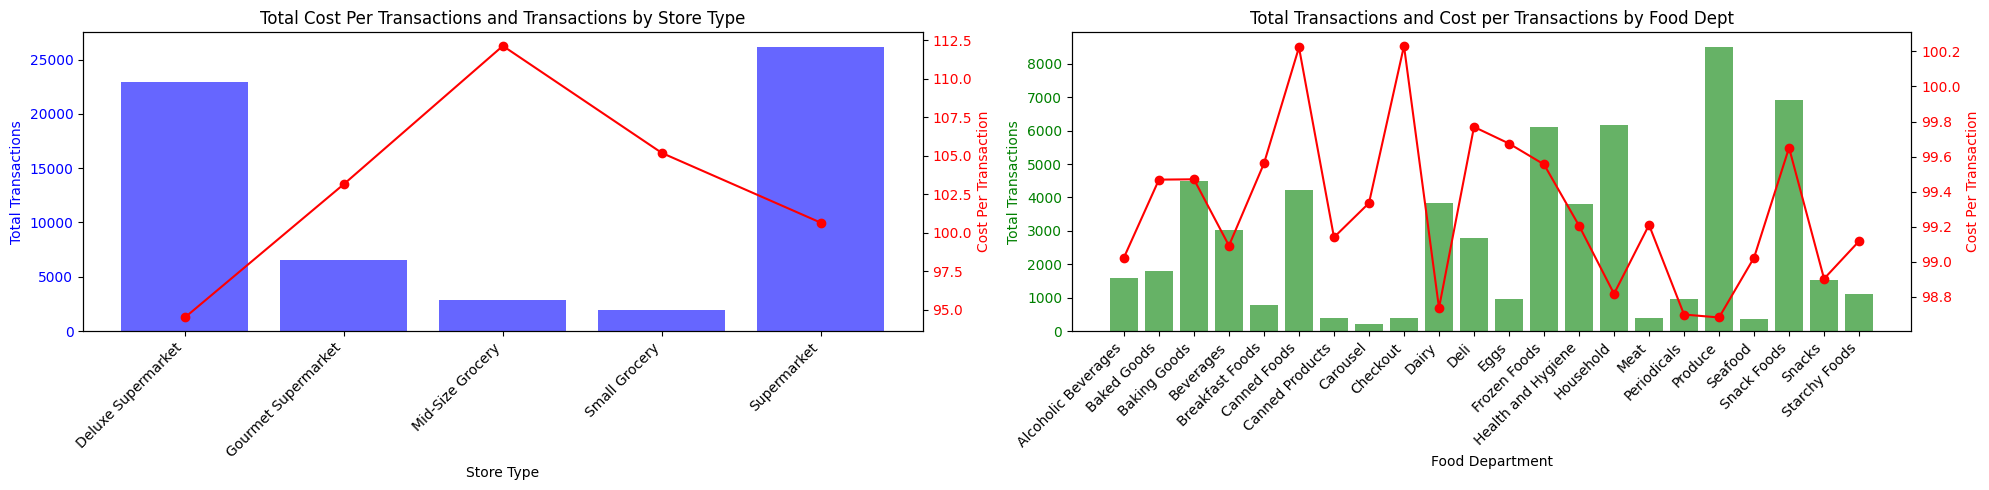

In [52]:
type_summary=store_lambda.groupby('store_type').agg(
    total_cost=('cost','sum'),
    total_transactions=('cost','count')
)
type_summary['cost_per_transaction']=type_summary['total_cost']/type_summary['total_transactions']

food_dept_summary=target_data.groupby('food_department').agg(
    total_cost=('cost','sum'),
    total_transactions=('cost','count')
)
food_dept_summary['cost_per_transaction']=food_dept_summary['total_cost']/food_dept_summary['total_transactions']

fig,(ax1,ax3)=plt.subplots(1,2,figsize=(20,5))

ax1.bar(type_summary.index,type_summary['total_transactions'],color='b',alpha=0.6)
ax1.set_xlabel('Store Type')
ax1.set_ylabel('Total Transactions',color='b')
ax1.tick_params(axis='y',labelcolor='b')

ax2=ax1.twinx()
ax2.plot(type_summary.index,type_summary['cost_per_transaction'],color='r',marker='o')
ax2.set_ylabel('Cost Per Transaction',color='r')
ax2.tick_params(axis='y',labelcolor='r')

ax1.set_xticks(range(len(type_summary.index)))
ax1.set_xticklabels(type_summary.index,rotation=45,ha='right')
ax1.set_title('Total Cost Per Transactions and Transactions by Store Type')


ax3.bar(food_dept_summary.index,food_dept_summary['total_transactions'],color='g',alpha=0.6)
ax3.set_xlabel('Food Department')
ax3.set_ylabel('Total Transactions',color='g')
ax3.tick_params(axis='y',labelcolor='g')

ax4=ax3.twinx()
ax4.plot(food_dept_summary.index,food_dept_summary['cost_per_transaction'],color='r',marker='o')
ax4.set_ylabel('Cost Per Transaction',color='r')
ax4.tick_params(axis='y',labelcolor='r')

ax3.set_xticks(range(len(food_dept_summary.index)))
ax3.set_xticklabels(food_dept_summary.index,rotation=45,ha='right')
ax3.set_title('Total Transactions and Cost per Transactions by Food Dept')

plt.tight_layout()
plt.show()

#### 5 c. Which country has higher number of stores and sales? 

In [53]:
country_summary=store_lambda.groupby('sales_country').agg(
    total_stores=('store_id','nunique'),
    total_transactions=('cost','count'),
    total_cost=('cost','sum')
).reset_index()
country_summary['cost_per_transaction'] =country_summary['total_cost']/country_summary['total_transactions']
country_summary['cost_per_store'] =country_summary['total_cost']/country_summary['total_stores']
country_summary.head()

,sales_country,total_stores,total_transactions,total_cost,cost_per_transaction,cost_per_store
0,Canada,2,3964,400444.72,101.020363,200222.360
1,Mexico,8,17572,1770717.36,100.769256,221339.670
2,USA,10,38892,3827064.18,98.402350,382706.418


In [54]:
# Map country names to ISO Alpha-3 codes
country_summary['iso_alpha'] = country_summary['sales_country'].map({
    'Canada': 'CAN',
    'Mexico': 'MEX',
    'USA': 'USA'
})

# Left Chart: Total Transactions and Total Stores across countries
fig1 = px.choropleth(
    country_summary,
    locations="iso_alpha",
    color="total_transactions",
    hover_name="sales_country",
    hover_data=["total_stores"],
    title="Total Transactions and Total Stores by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig1.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Right Chart: Cost per Transaction and Cost per Store across countries
fig2 = px.choropleth(
    country_summary,
    locations="iso_alpha",
    color="cost_per_transaction",
    hover_name="sales_country",
    hover_data=["cost_per_store"],
    title="Cost per Transaction and Cost per Store by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig2.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Show plots
fig1.show()
fig2.show()


#### Insights:
- Store size doesnt correlate positively with the demand
- Deluxe Supermarket and Supermarket attract more transactions, suggesting higher customer footfall. However, customers spend more per transaction in Deluxe and Gourmet Supermarkets, potentially indicating these stores cater to a higher-income demographic or offer premium products.
- Deluxe and Gourmet Supermarkets see higher spending per transaction, suggesting they attract more affluent customers or offer more expensive products. Regular Supermarkets and Small Groceries attract more total transactions, likely due to their broader customer base and accessibility.
- Popular food departments are essential for store traffic, but the cost per transaction does not vary significantly across departments. This indicates that while certain food departments drive more sales, the spending behavior per transaction remains relatively consistent.
- Departments like Beverages, Dairy, and Meat are crucial for high transaction volumes. Maintaining a balanced product mix that includes both high-demand items and premium products could optimize revenue.
- US seems to be the biggest market for the FoodMart as majority of the demand is harnessed there. Also the cost per transaction is low given the demand is so high.

## 6. What is the customer demographics to target?
#### a. What is the percentage of demand from members? 
#### b. Does this mart cater to high income customers? 

In [55]:
customer_lambda=(cac_data.drop(columns='avg_cars_at home(approx).1'))
customer_lambda=customer_lambda.merge((customer_data.assign(customer_id=lambda df: np.arange(len(df))).set_index(customer_features)
                                           ),on=customer_features,)
customer_lambda.columns
columns_to_drop=['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name','brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type']
customer_lambda.drop(columns=columns_to_drop,inplace=True)

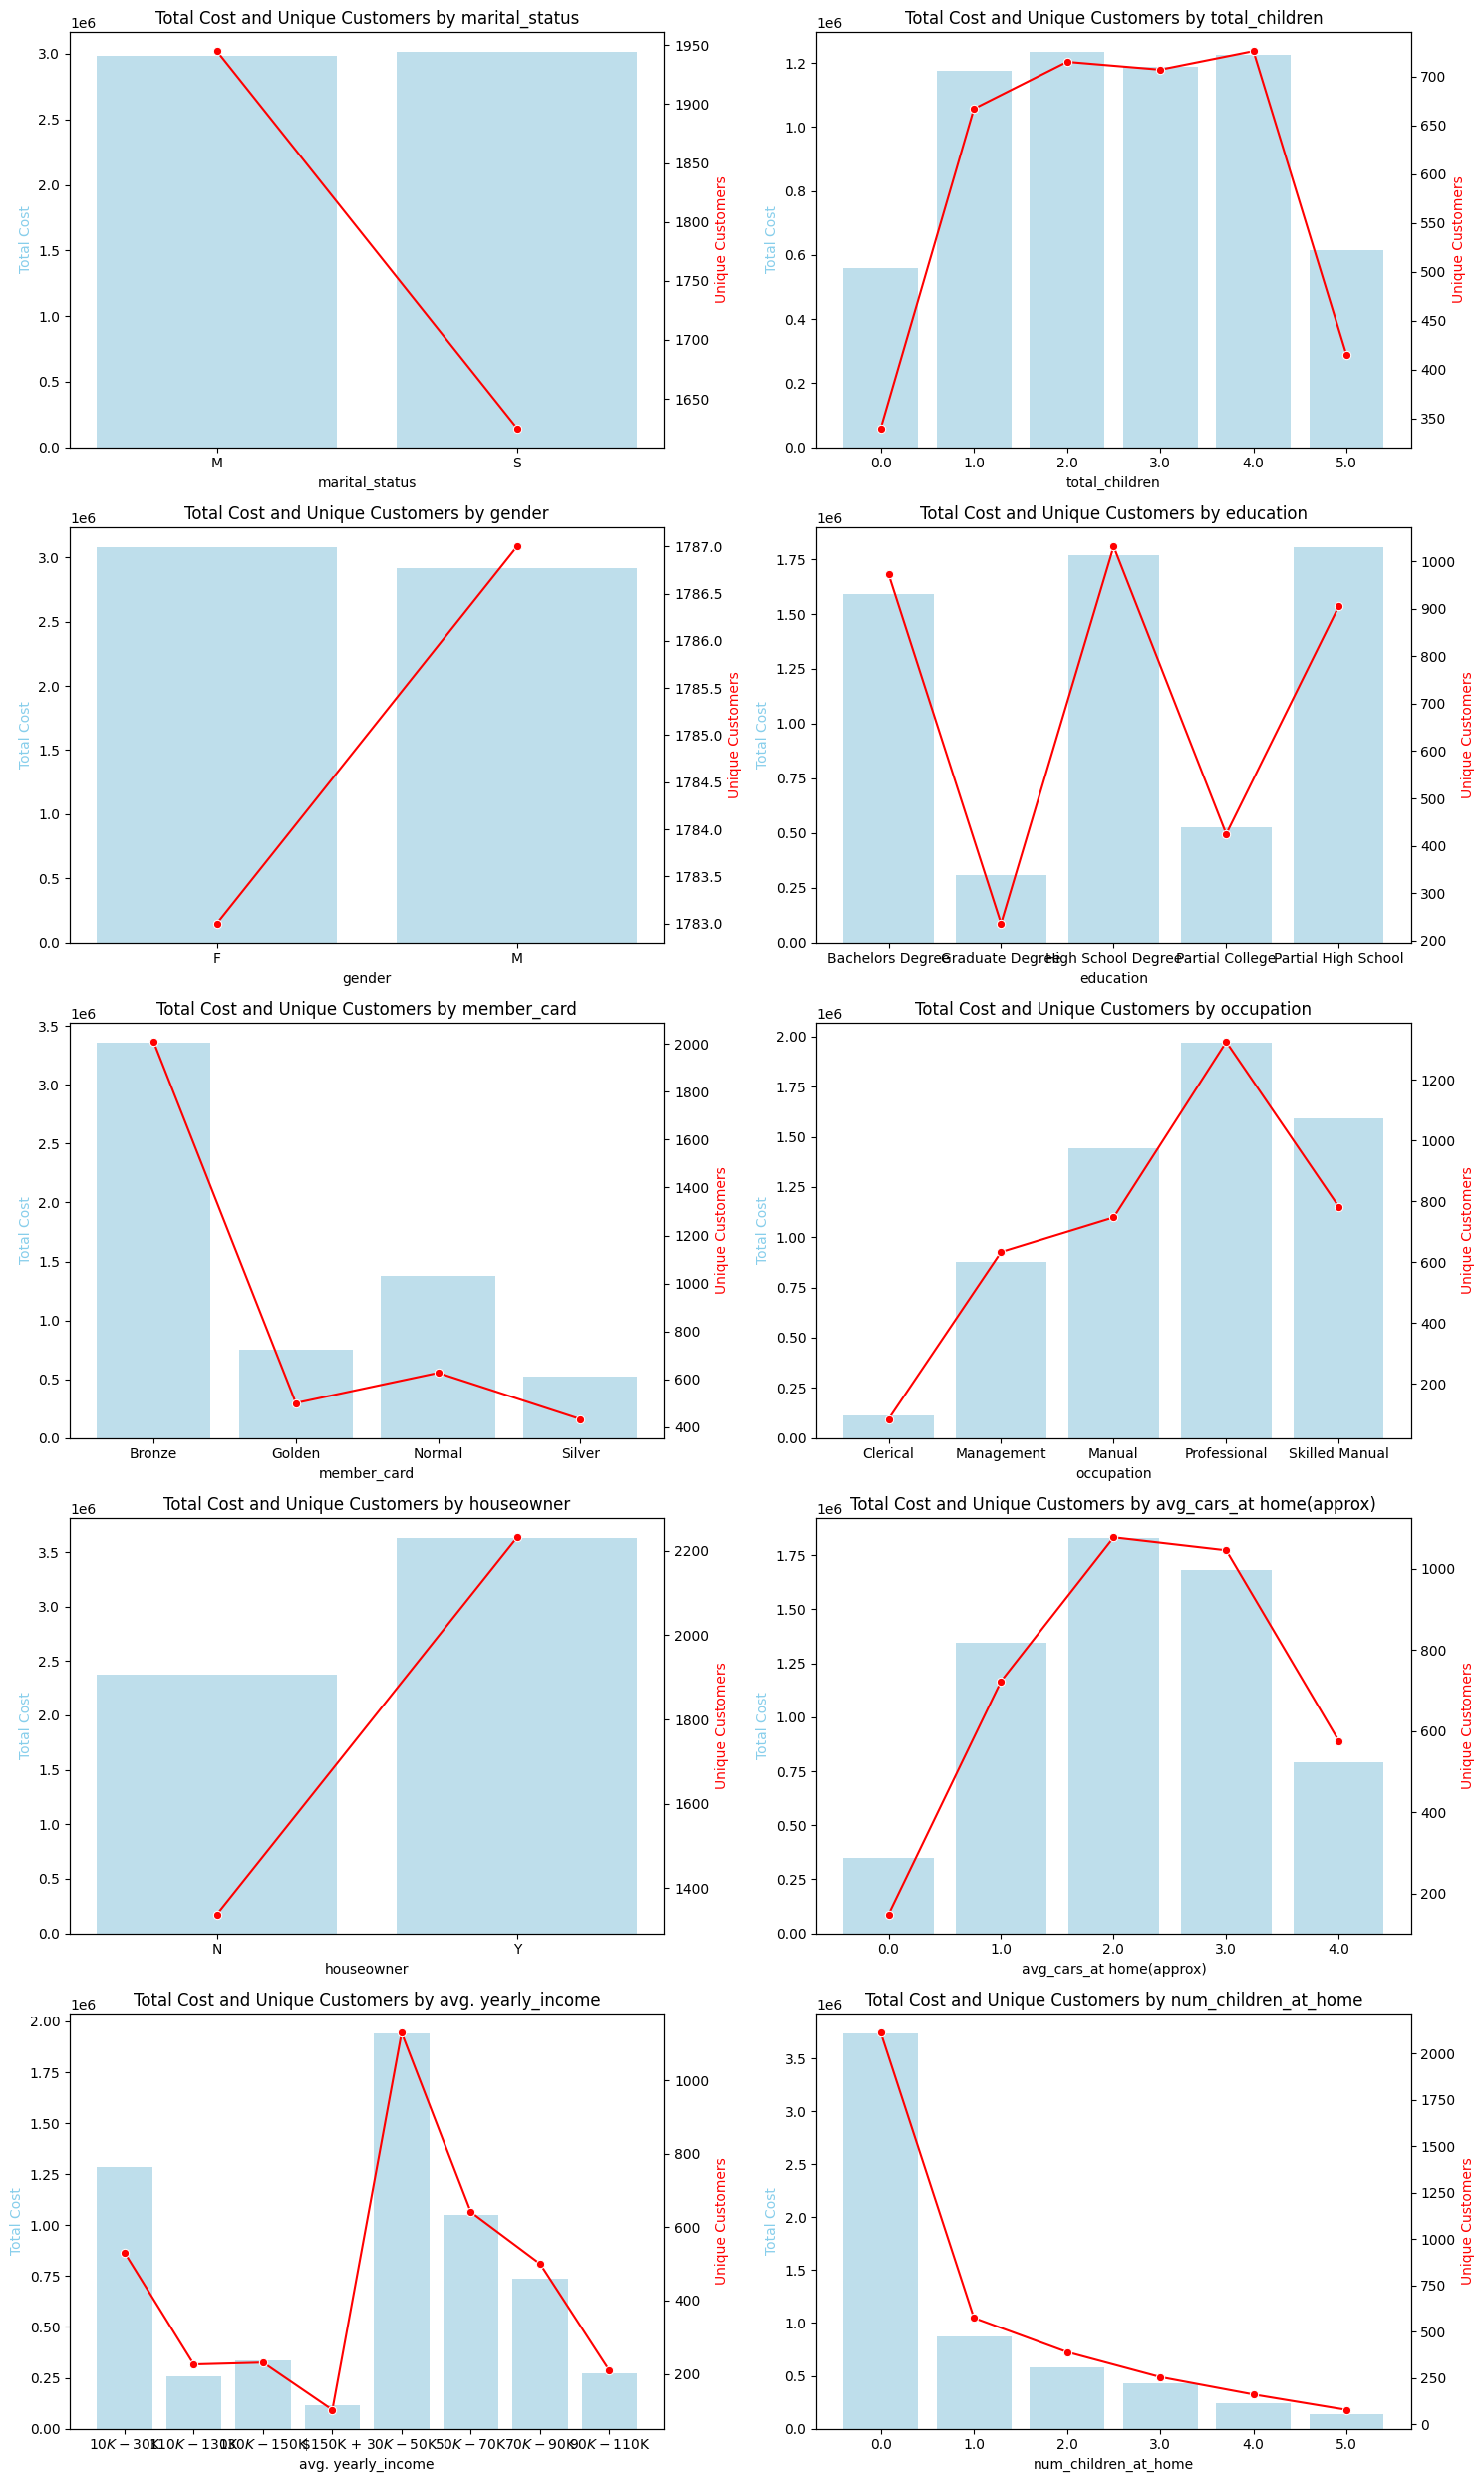

In [56]:
def combo_chart(df, column, ax1):

    cost_data = df.groupby(column)['cost'].sum().reset_index()
    customer_data = df.groupby(column)['customer_id'].nunique().reset_index()
    merged_data = pd.merge(cost_data, customer_data, on=column)
    

    sns.barplot(x=column, y='cost', data=merged_data, ax=ax1, color='skyblue', alpha=0.6)
    

    ax2 = ax1.twinx()
    sns.lineplot(x=column, y='customer_id', data=merged_data, ax=ax2, color='red', marker='o')
    

    ax1.set_xlabel(column)
    ax1.set_ylabel('Total Cost', color='skyblue')
    ax2.set_ylabel('Unique Customers', color='red')
    ax1.set_title(f'Total Cost and Unique Customers by {column}')


categorical_columns = ['marital_status', 'total_children', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home']

n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))


for idx, column in enumerate(categorical_columns):
    row = idx // n_cols
    col = idx % n_cols
    combo_chart(customer_lambda, column, axes[row, col])


for idx in range(len(categorical_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


#### Insights:
- Marital Status and Homeownership: Married individuals and homeowners are key segments with higher spending.
- Children: Families with 2-3 children and households without children are important segments.
- Education and Occupation: Higher education levels and professional occupations correlate with higher spending. Professionals and those in management roles tend to spend more and are the most frequent customers.
- Member Card: Bronze members are the most active and highest spending segment.
- Income and Cars: Middle-income households and those with 2 cars are significant spenders. Middle-income groups ($50K-$70K) spend the most, while slightly lower-income groups ($30K-$50K) have the highest number of unique customers.
- Gender: Spending is balanced, with a slight edge for females in total spending and males in the number of unique customers.

In [13]:
training_data,prediction_data=train_test_split(modelling_data,test_size=0.2,random_state=42)

prediction_data=prediction_data.drop(columns=['target'])

modelling_data.to_csv('cac_training_data.csv',index=False)
prediction_data.to_csv('cac_prediction_data.csv',index=False)

In [14]:
modelling_data.head()

,sales_country,n_products,target,store_id_0,store_id_1,store_id_2,store_id_3,store_id_4,store_id_5,store_id_6,store_id_7,store_id_8,store_id_9,store_id_10,store_id_11,store_id_12,store_id_13,store_id_14,store_id_15,store_id_16,store_id_17,store_id_18,store_id_19,promotion_name,Daily Paper,Radio,In-Store Coupon,Product Attachment,Sunday Paper,TV,Street Handout,Bulk Mail,Cash Register Handout
0,USA,22,22,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,Bag Stuffers,1,1,0,0,0,0,0,0,0
1,USA,514,593,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Bag Stuffers,1,1,0,0,0,0,0,0,0
2,USA,583,726,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Cash Register Lottery,1,1,0,0,0,0,0,0,0
3,USA,213,228,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,High Roller Savings,1,1,0,0,0,0,0,0,0
4,USA,238,254,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Cash Register Lottery,0,0,1,0,0,0,0,0,0


In [15]:
modelling_data.columns

Index(['sales_country', 'n_products', 'target', 'store_id_0', 'store_id_1',
       'store_id_2', 'store_id_3', 'store_id_4', 'store_id_5', 'store_id_6',
       'store_id_7', 'store_id_8', 'store_id_9', 'store_id_10', 'store_id_11',
       'store_id_12', 'store_id_13', 'store_id_14', 'store_id_15',
       'store_id_16', 'store_id_17', 'store_id_18', 'store_id_19',
       'promotion_name', 'Daily Paper', 'Radio', 'In-Store Coupon',
       'Product Attachment', 'Sunday Paper', 'TV', 'Street Handout',
       'Bulk Mail', 'Cash Register Handout'],
      dtype='object')

In [17]:
modelling_data['promotion_name'].unique()

array(['Bag Stuffers', 'Cash Register Lottery', 'High Roller Savings',
       'Double Down Sale', 'Green Light Days', 'Big Time Savings',
       'Price Savers', 'Price Slashers', 'Dollar Days', 'Two Day Sale',
       'Super Duper Savers', 'Weekend Markdown', 'Dollar Cutters',
       'Sales Galore', 'Big Promo', 'Free For All', 'Savings Galore',
       'Unbeatable Price Savers', 'Price Smashers', 'Shelf Clearing Days',
       'Sales Days', 'Go For It', 'Super Savers', 'Wallet Savers',
       'Save-It Sale', 'Price Destroyers', 'Two for One',
       'Big Time Discounts', 'One Day Sale', 'Fantastic Discounts',
       'Shelf Emptiers', 'Saving Days', 'You Save Days', 'Sale Winners',
       'Coupon Spectacular', 'Three for One', 'Price Winners',
       'Dimes Off', 'I Cant Believe It Sale', 'Money Savers',
       'Bye Bye Baby', 'Green Light Special', 'Price Cutters',
       'Tip Top Savings', 'Best Savings', 'Pick Your Savings',
       'Double Your Savings', 'Mystery Sale', 'Super Wallet S